In [78]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima.arima import auto_arima

In [13]:
df = pd.read_csv('cpi_w_gold_oil.csv', index_col = 0).dropna(axis=1)
df.index = pd.to_datetime(cpi.index, infer_datetime_format = True)

df

,Food,Food at home,Cereals and bakery products,Cereals and cereal products,Flour and prepared flour mixes,Breakfast cereal,"Rice, pasta, cornmeal",Bakery products,Bread,"Fresh biscuits, rolls, muffins",...,New and used motor vehicles,Utilities and public transportation,Household furnishings and operations,Other goods and services,Personal care,Recorded music and music subscriptions,"Men's underwear, nightwear, swimwear, and accessories",All items,Crude Oil Price,Gold US dollar per oz
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,232.666,231.694,266.677,234.159,252.159,228.664,242.992,283.880,170.658,167.911,...,99.659,205.521,125.629,391.382,210.299,89.691,148.547,227.842,100.27,1656.1
2012-02-01,232.486,231.180,267.821,233.362,250.564,227.984,242.217,286.484,172.978,168.364,...,99.889,205.398,126.180,391.236,210.330,89.896,148.183,228.329,102.20,1742.6
2012-03-01,232.792,231.383,267.101,232.660,252.104,227.997,238.975,285.771,172.955,168.406,...,100.325,205.637,126.107,392.364,211.289,89.704,149.106,228.807,106.16,1673.8
2012-04-01,233.234,231.711,268.014,233.662,252.102,228.862,240.693,286.589,173.559,166.211,...,100.977,206.050,126.114,393.320,211.865,89.084,150.584,229.187,103.32,1650.1
2012-05-01,233.339,231.518,268.653,235.054,254.336,230.326,241.615,286.629,173.581,167.158,...,101.399,206.866,125.905,392.859,211.649,88.904,155.044,228.713,94.66,1585.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,279.135,259.825,288.990,236.194,248.823,229.855,245.495,319.545,192.971,186.280,...,119.475,229.805,132.076,479.048,244.968,79.549,167.846,273.092,67.73,1784.0
2021-09-01,281.506,262.695,292.069,236.183,250.198,229.122,245.890,324.458,196.492,194.852,...,117.947,229.568,133.462,479.525,244.840,79.820,168.872,274.214,71.65,1777.3
2021-10-01,284.205,265.478,294.625,239.371,249.956,236.615,245.062,326.628,198.052,195.203,...,120.192,231.301,134.745,483.592,246.307,79.954,170.986,276.590,81.48,1776.9


In [93]:
m0 = auto_arima(df['All items'])
m0

ARIMA(order=(2, 2, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

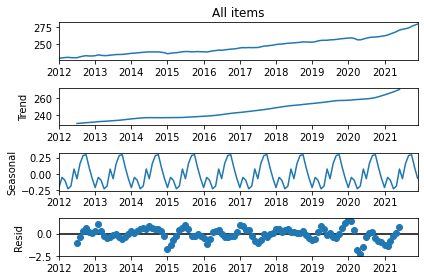

In [25]:
decom_all = seasonal_decompose(df['All items'], model='additive')
decom_all.plot()
plt.show()

In [45]:
dftest = adfuller(df['All items'])
print(f'ADF: {dftest[0]}')
print(f'p-value: {dftest[1]}')

ADF Statistic: 3.207398432597587
p-value: 1.0


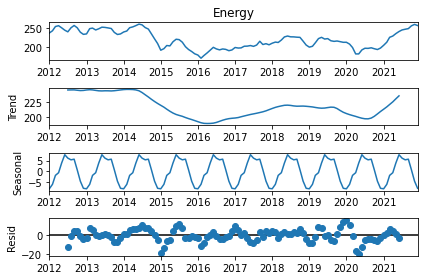

In [26]:
decom_energy = seasonal_decompose(df['Energy'], model='additive')
decom_energy.plot()
plt.show()

In [46]:
dftest = adfuller(df['Energy'])
print(f'ADF: {dftest[0]}')
print(f'p-value: {dftest[1]}')

ADF Statistic: -2.4943550477219776
p-value: 0.11685385107043395


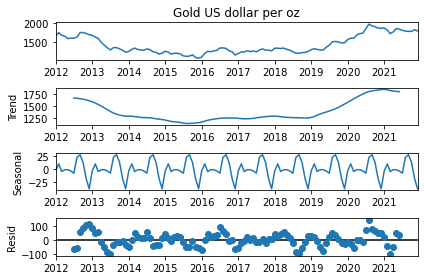

In [27]:
decom_gold = seasonal_decompose(df['Gold US dollar per oz'], model='additive')
decom_gold.plot()
plt.show()

In [47]:
dftest = adfuller(df['Gold US dollar per oz'])
print(f'ADF: {dftest[0]}')
print(f'p-value: {dftest[1]}')

ADF Statistic: -1.4162989240986645
p-value: 0.5744377485539449


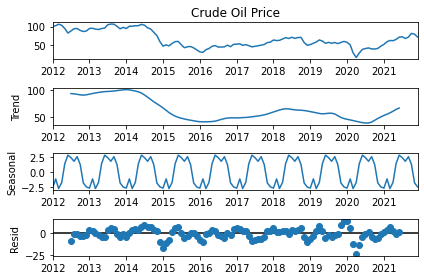

In [28]:
decom_oil = seasonal_decompose(df['Crude Oil Price'], model='additive')
decom_oil.plot()
plt.show()

In [48]:
dftest = adfuller(df['Crude Oil Price'])
print(f'ADF: {dftest[0]}')
print(f'p-value: {dftest[1]}')

ADF Statistic: -2.1770326103538133
p-value: 0.21468663304385655


In [54]:
df_diff = (((df.diff()).dropna()).diff()).dropna()

In [59]:
dftest = adfuller(df_diff['All items'])
print(f'ADF: {dftest[0]}')
print(f'p-value: {dftest[1]}')

ADF: -6.949330288859254
p-value: 9.784625248720014e-10


In [60]:
dftest = adfuller(df_diff['Energy'])
print(f'ADF: {dftest[0]}')
print(f'p-value: {dftest[1]}')

ADF: -5.6288250931549575
p-value: 1.1014469748260122e-06


In [61]:
dftest = adfuller(df_diff['Gold US dollar per oz'])
print(f'ADF: {dftest[0]}')
print(f'p-value: {dftest[1]}')

ADF: -5.681994926541069
p-value: 8.444685377391198e-07


In [62]:
dftest = adfuller(df_diff['Crude Oil Price'])
print(f'ADF: {dftest[0]}')
print(f'p-value: {dftest[1]}')

ADF: -7.436626780896577
p-value: 6.159050389789512e-11


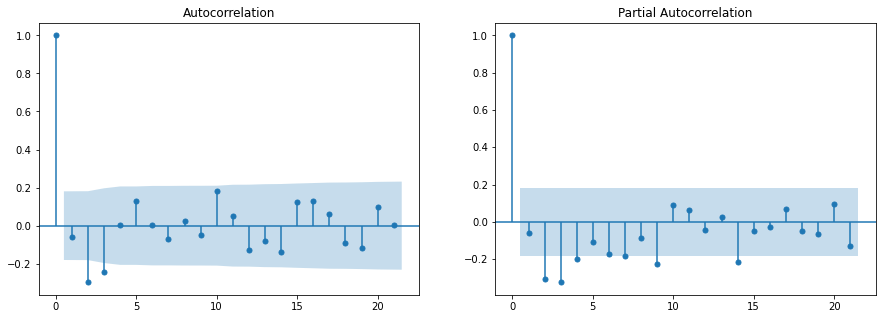

In [69]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
plot_acf(df_diff['All items'], ax1)
plot_pacf(df_diff['All items'], ax2)
plt.show()

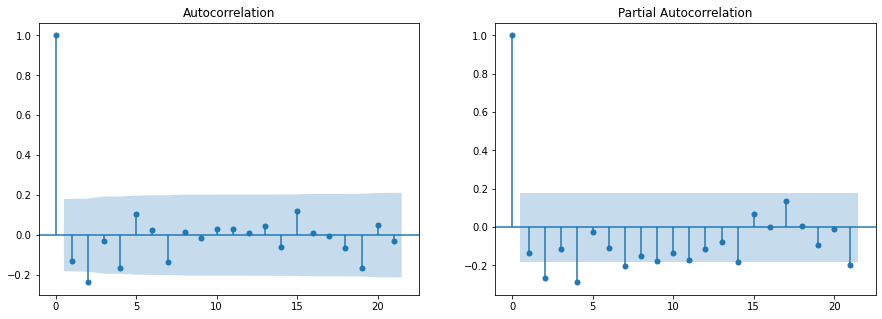

In [79]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
plot_acf(df_diff['Energy'], ax1)
plot_pacf(df_diff['Energy'], ax2)
plt.show()

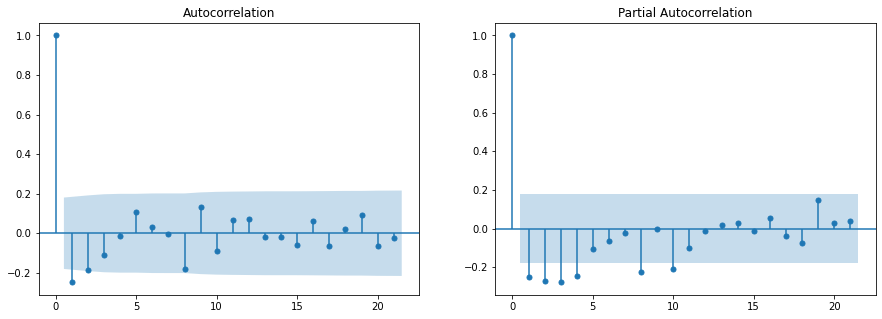

In [85]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
plot_acf(df_diff['Gold US dollar per oz'], ax1)
plot_pacf(df_diff['Gold US dollar per oz'], ax2)
plt.show()

In [71]:
train = df.iloc[:96]
test = df.iloc[96::]
train_diff = train.diff().dropna()

In [97]:
grid_search = auto_arima(train['All items'], start_p=0, start_q=0, max_p=5, max_q=5, m = 12, seasonal=True, d=2, D=0, 
                            trace=True, suppress_warnings=True, error_action='ignore', stepwise=True)
print(grid_search.aic())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=148.927, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=148.669, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=149.139, Time=0.02 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=133.062, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=131.089, Time=0.02 sec
 ARIMA(0,2,1)(1,0,0)[12]             : AIC=133.075, Time=0.03 sec
 ARIMA(0,2,1)(1,0,1)[12]             : AIC=132.260, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=inf, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[12]             : AIC=118.012, Time=0.03 sec
 ARIMA(0,2,2)(1,0,0)[12]             : AIC=119.859, Time=0.06 sec
 ARIMA(0,2,2)(0,0,1)[12]             : AIC=119.790, Time=0.07 sec
 ARIMA(0,2,2)(1,0,1)[12]             : AIC=120.063, Time=0.20 sec
 ARIMA(1,2,2)(0,0,0)[12]             : AIC=119.742, Time=0.07 sec
 ARIMA(0,2,3)(0,0,0)[12]             : AIC=119.379, Time=0.08 sec
 ARIMA(1,2,3)(0,0,0)[12]             

In [96]:
grid_search = auto_arima(train['Energy'], start_p=0, start_q=0, max_p=5, max_q=5, m = 12, seasonal=True, d=2, D=0, 
                            trace=True, suppress_warnings=True, error_action='ignore', stepwise=True)
print(grid_search.aic())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=625.751, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=622.491, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=622.902, Time=0.03 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=623.959, Time=0.02 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=624.018, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=622.133, Time=0.01 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=623.065, Time=0.03 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=624.669, Time=0.07 sec
 ARIMA(2,2,0)(0,0,0)[12]             : AIC=618.540, Time=0.01 sec
 ARIMA(2,2,0)(1,0,0)[12]             : AIC=618.978, Time=0.03 sec
 ARIMA(2,2,0)(0,0,1)[12]             : AIC=619.248, Time=0.04 sec
 ARIMA(2,2,0)(1,0,1)[12]             : AIC=620.073, Time=0.10 sec
 ARIMA(3,2,0)(0,0,0)[12]             : AIC=619.641, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[12]             

In [94]:
grid_search = auto_arima(train['Gold US dollar per oz'], start_p=0, start_q=0, max_p=5, max_q=5, m = 12, seasonal=True, d=2, D=0, 
                            trace=True, suppress_warnings=True, error_action='ignore', stepwise=True)
print(grid_search.aic())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=1009.090, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1005.090, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1000.342, Time=0.03 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=982.583, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=980.637, Time=0.02 sec
 ARIMA(0,2,1)(1,0,0)[12]             : AIC=982.569, Time=0.04 sec
 ARIMA(0,2,1)(1,0,1)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=974.486, Time=0.04 sec
 ARIMA(1,2,1)(1,0,0)[12]             : AIC=inf, Time=0.07 sec
 ARIMA(1,2,1)(0,0,1)[12]             : AIC=976.451, Time=0.17 sec
 ARIMA(1,2,1)(1,0,1)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=998.498, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[12]             : AIC=976.205, Time=0.07 sec
 ARIMA(1,2,2)(0,0,0)[12]             : AIC=976.370, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[12]             : AIC

In [95]:
grid_search = auto_arima(train['Crude Oil Price'], start_p=0, start_q=0, max_p=5, max_q=5, m = 12, seasonal=True, d=2, D=0, 
                            trace=True, suppress_warnings=True, error_action='ignore', stepwise=True)
print(grid_search.aic())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=604.307, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=600.874, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=595.245, Time=0.02 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=inf, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=594.705, Time=0.01 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=594.795, Time=0.03 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=596.622, Time=0.07 sec
 ARIMA(2,2,0)(0,0,0)[12]             : AIC=594.193, Time=0.01 sec
 ARIMA(2,2,0)(1,0,0)[12]             : AIC=595.034, Time=0.04 sec
 ARIMA(2,2,0)(0,0,1)[12]             : AIC=594.673, Time=0.05 sec
 ARIMA(2,2,0)(1,0,1)[12]             : AIC=596.457, Time=0.10 sec
 ARIMA(3,2,0)(0,0,0)[12]             : AIC=586.697, Time=0.03 sec
 ARIMA(3,2,0)(1,0,0)[12]             : AIC=587.168, Time=0.06 sec
 ARIMA(3,2,0)(0,0,1)[12]             : AIC=586.909, Time=0.07 sec
 ARIMA(3,2,0)(1,0,1)[12]             

In [84]:
best_p = [(0,2,0), (0,2,1), (1,2,1), (4,2,0)]

__As shown by the best models, it seems like SARIMA would not make a difference with this dataset. It seems like seasonality isn't a factor after differencing is performed.__